In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_decision_regions
sns.set()

In [ ]:
cd = pd.read_csv('/content/drive/MyDrive/Classified Data')
cd

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [ ]:
cd.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500000,288.819436,0.000000,249.750000,499.500000,749.250000,999.000000
WTT,1000.0,0.949682,0.289635,0.174412,0.742358,0.940475,1.163295,1.721779
PTI,1000.0,1.114303,0.257085,0.441398,0.942071,1.118486,1.307904,1.833757
EQW,1000.0,0.834127,0.291554,0.170924,0.615451,0.813264,1.028340,1.722725
SBI,1000.0,0.682099,0.229645,0.045027,0.515010,0.676835,0.834317,1.634884
LQE,1000.0,1.032336,0.243413,0.315307,0.870855,1.035824,1.198270,1.650050
QWG,1000.0,0.943534,0.256121,0.262389,0.761064,0.941502,1.123060,1.666902
FDJ,1000.0,0.963422,0.255118,0.295228,0.784407,0.945333,1.134852,1.713342
PJF,1000.0,1.071960,0.288982,0.299476,0.866306,1.065500,1.283156,1.785420
HQE,1000.0,1.158251,0.293738,0.365157,0.934340,1.165556,1.383173,1.885690


In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [ ]:
cd.isnull().sum()

Unnamed: 0      0
WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [ ]:
cd_copy= cd.copy(deep=True)
cd_copy[['WTT',	'PTI',	'EQW',	'SBI',	'LQE']] = cd_copy[['WTT',	'PTI',	'EQW',	'SBI',	'LQE']].replace(0,np.NaN)

In [ ]:
print(cd_copy.isnull().sum())

Unnamed: 0      0
WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64


In [ ]:
cd_copy.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


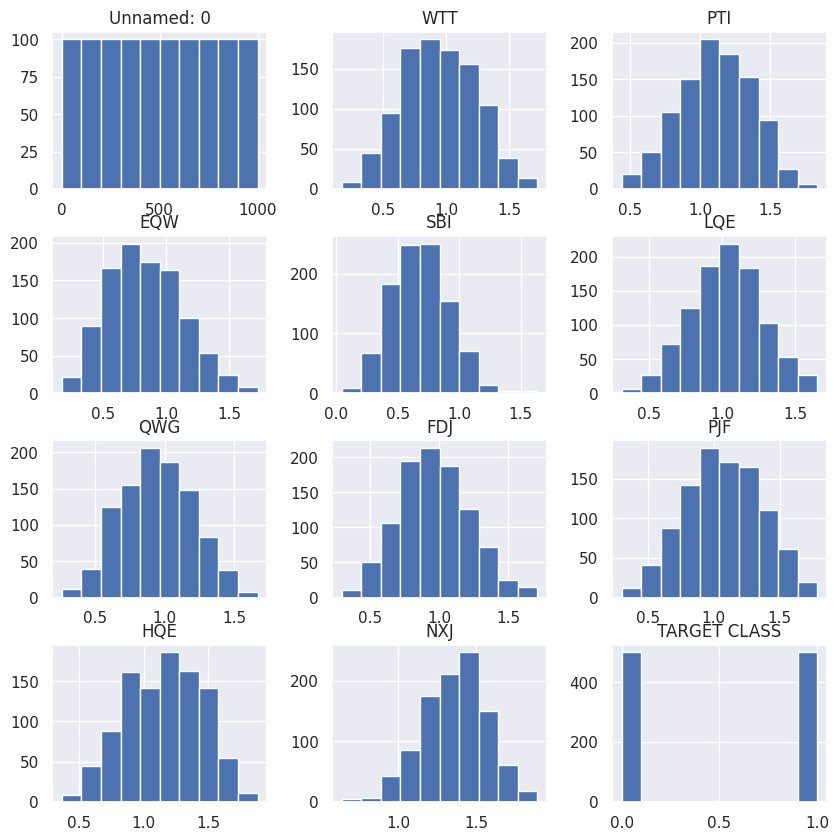

In [ ]:
p=cd.hist(figsize=(10,10))

In [ ]:
cd_copy['WTT'].fillna(cd_copy['WTT'].mean(),inplace=True)
cd_copy['PTI'].fillna(cd_copy['PTI'].mean(),inplace=True)
cd_copy['EQW'].fillna(cd_copy['EQW'].median(),inplace=True)
cd_copy['SBI'].fillna(cd_copy['SBI'].median(),inplace=True)
cd_copy['LQE'].fillna(cd_copy['LQE'].median(),inplace=True)

In [ ]:
cd_copy.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
cd_copy.shape

(1000, 12)

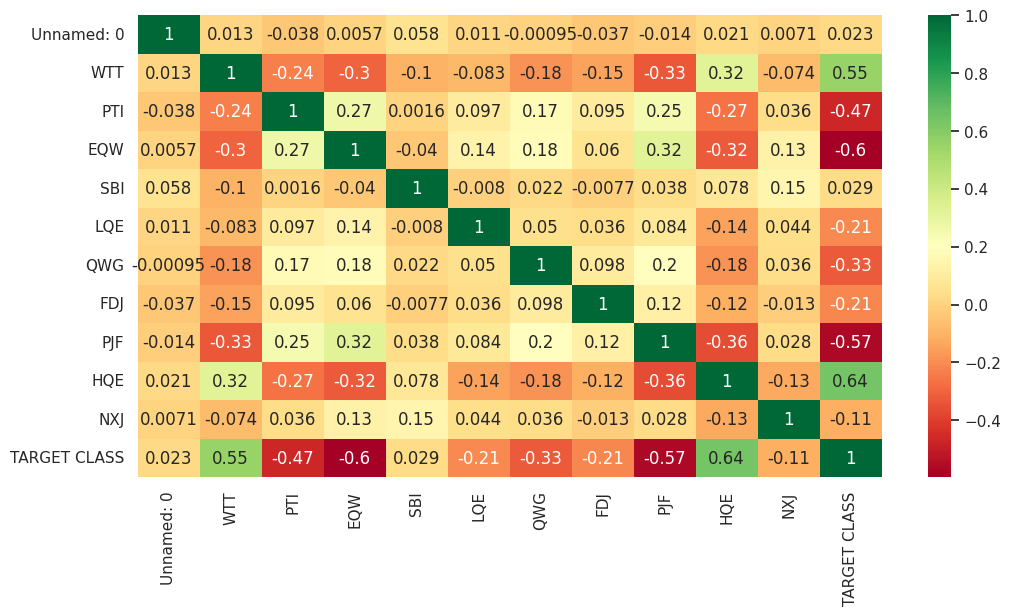

In [ ]:
plt.figure(figsize=(12,6))
p = sns.heatmap(cd_copy.corr(),annot=True,cmap='RdYlGn')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x = pd.DataFrame(scaler.fit_transform(cd_copy.drop(['TARGET CLASS'],axis=1),),
                 columns=['Unnamed:0','WTT',	'PTI',	'EQW',	'SBI',	'LQE',	'QWG',	'FDJ',	'PJF',	'HQE',	'NXJ'	])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(cd_copy,cd['TARGET CLASS'],
                                                                           test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

In [ ]:
print(accuracy_score(labels_test, pred))

0.63


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
print(confusion_matrix(labels_test, pred))

[[99 49]
 [62 90]]


In [ ]:
print(classification_report(labels_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       148
           1       0.65      0.59      0.62       152

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300



In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
error_rate = []

for k in range(1,80):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    error_rate.append(np.mean(pred != labels_test))

Text(0, 0.5, 'Error Rate')

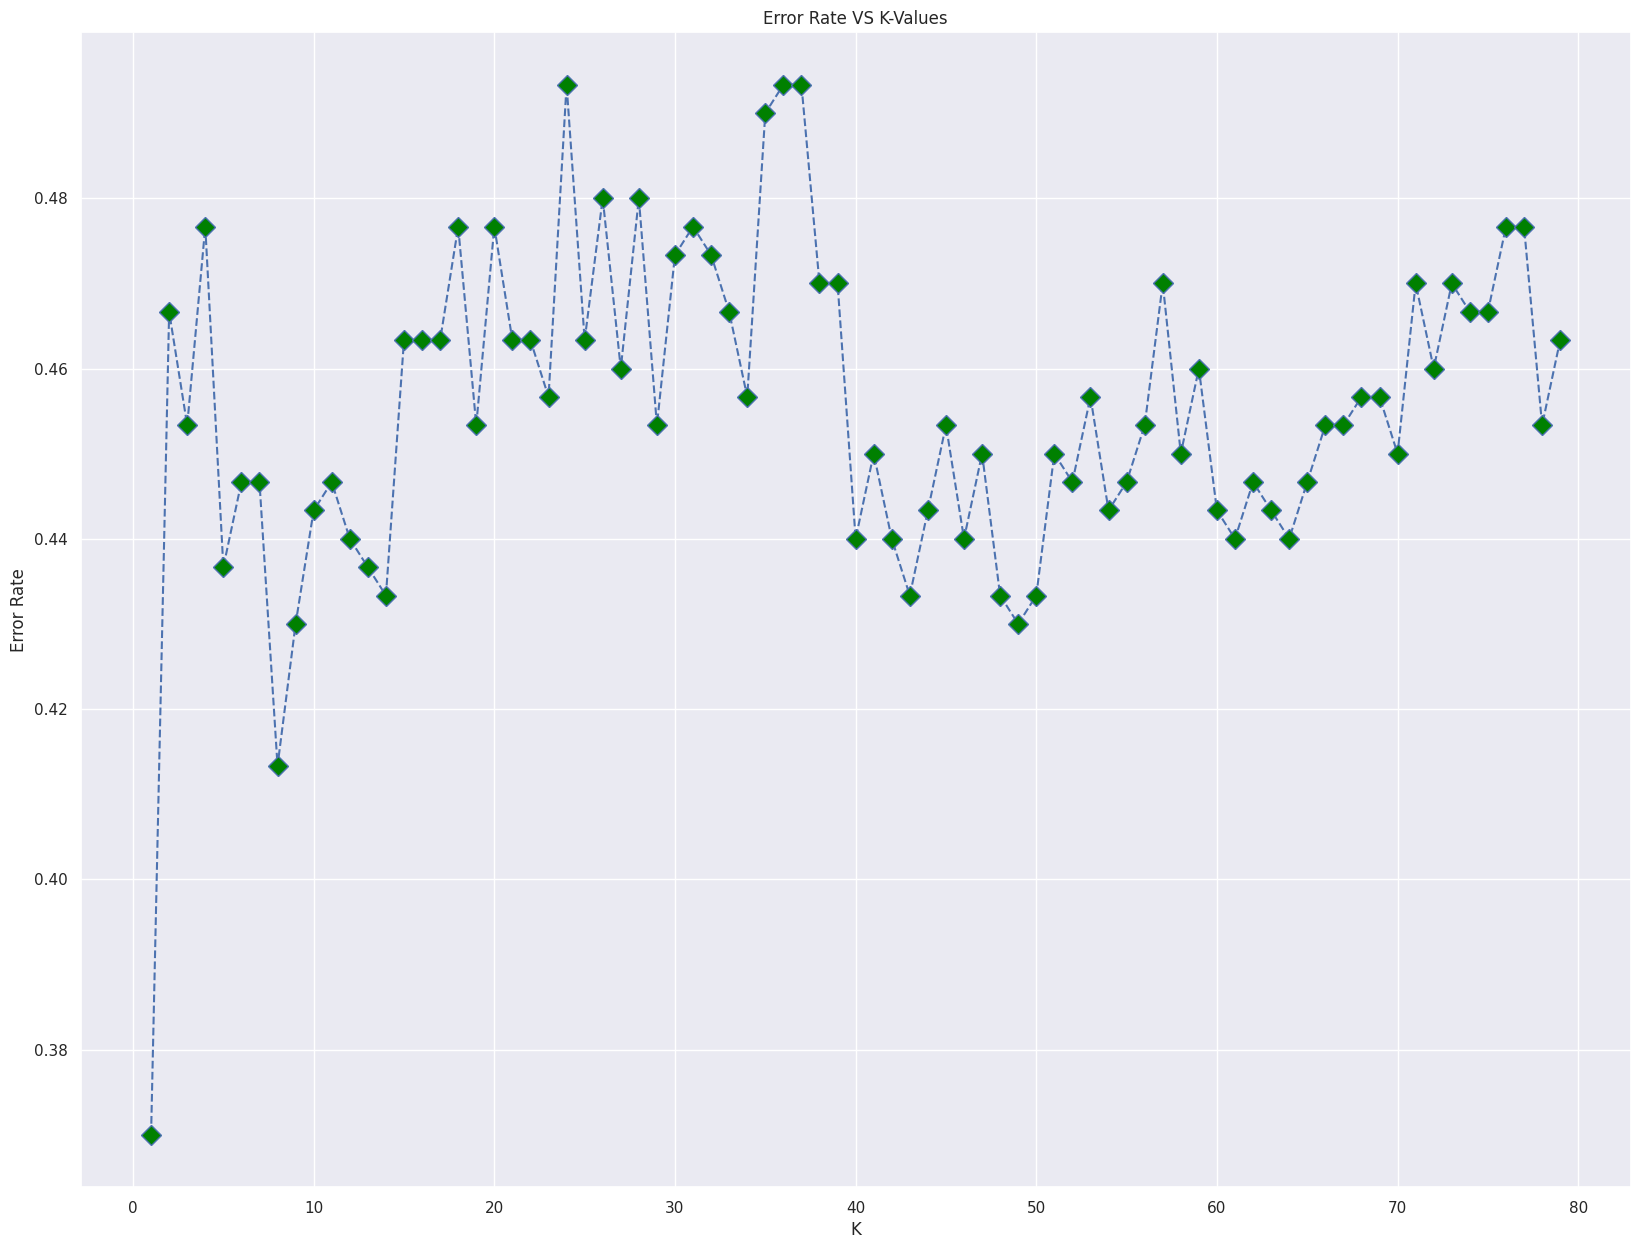

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(range(1,80), error_rate, linestyle='--', marker='D', markerfacecolor='green', markersize=10)
plt.title('Error Rate VS K-Values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:

clf = KNeighborsClassifier(n_neighbors=31)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print(accuracy_score(labels_test, pred))

0.5233333333333333


In [ ]:
print('With K = 32')
print(confusion_matrix(labels_test, pred))
print(classification_report(labels_test, pred))

With K = 32
[[72 76]
 [67 85]]
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       148
           1       0.53      0.56      0.54       152

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300

